In [119]:
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
import numpy as np

In [120]:
DATA_PATH = "/home/mathuis/Development/cyber_wolf/data"
HL_SIZE = 13

In [121]:
def load_data(path: str):
    print("Loading data")
    return np.load(path, allow_pickle=True)


def build_model():
    print("Building model")
    
    input_layer = layers.Input(shape=(98,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)
    decoded = layers.Dense(98, activation="relu")(encoded)

    model = keras.Model(input_layer, decoded)    

    return model

def train_model(model, x_train, x_test):
    print("Compiling model")
    model.compile(optimizer="adam", loss="msle", metrics=["mse", "msle", "mae", "mape", "cosine_similarity"])
    print("Training model")
    return model.fit(x_train, x_train, epochs=8, validation_data=(x_test, x_test))


def plot(history):
    print(history.keys())

    for key in history.keys():
        if not key.startswith("val_"):
            pyplot.plot()

            pyplot.title(key)
            pyplot.plot(history[key], label="train")
            pyplot.plot(history[f"val_{key}"], label="test")
            pyplot.xlabel("Epoch")
            pyplot.ylabel(key)
            pyplot.legend()

            pyplot.show()

def evaluate_model(model, x_test):
    results = model.evaluate(x_test, x_test)
    print(f"Test Loss: {results}")

In [122]:
x_train = load_data(f"{DATA_PATH}/datasets/x_train.npy")
x_test = load_data(f"{DATA_PATH}/datasets/x_test.npy")
    

Loading data
Loading data


In [123]:
model = build_model()
model.summary()

Building model
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 98)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 13)                1287      
_________________________________________________________________
dense_21 (Dense)             (None, 98)                1372      
Total params: 2,659
Trainable params: 2,659
Non-trainable params: 0
_________________________________________________________________


In [124]:
res = train_model(model, x_train, x_test)

Compiling model
Training model
Epoch 1/8
302/302 [==============================] - 4s 9ms/step - loss: 0.1437 - mse: 18.1073 - msle: 0.1437 - mae: 0.4778 - mape: 113322463.3003 - cosine_similarity: 0.6118 - val_loss: 0.0697 - val_mse: 10.2812 - val_msle: 0.0697 - val_mae: 0.3116 - val_mape: 28706958.0000 - val_cosine_similarity: 0.9218
Epoch 2/8
302/302 [==============================] - 2s 6ms/step - loss: 0.0651 - mse: 8.3397 - msle: 0.0651 - mae: 0.2835 - mape: 26437054.3828 - cosine_similarity: 0.9285 - val_loss: 0.0570 - val_mse: 4.8861 - val_msle: 0.0570 - val_mae: 0.2266 - val_mape: 20116124.0000 - val_cosine_similarity: 0.9372
Epoch 3/8
302/302 [==============================] - 2s 7ms/step - loss: 0.0557 - mse: 4.1957 - msle: 0.0557 - mae: 0.2141 - mape: 18893182.8185 - cosine_similarity: 0.9420 - val_loss: 0.0505 - val_mse: 3.0901 - val_msle: 0.0505 - val_mae: 0.1818 - val_mape: 13315822.0000 - val_cosine_similarity: 0.9467
Epoch 4/8
302/302 [==============================] 

dict_keys(['loss', 'mse', 'msle', 'mae', 'mape', 'cosine_similarity', 'val_loss', 'val_mse', 'val_msle', 'val_mae', 'val_mape', 'val_cosine_similarity'])


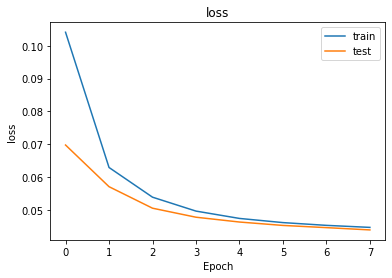

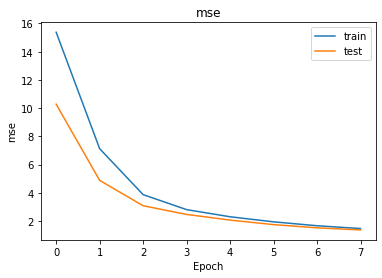

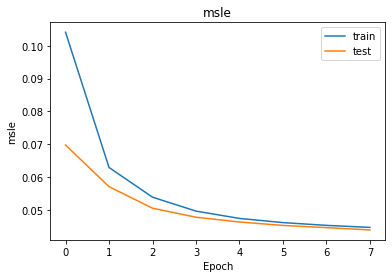

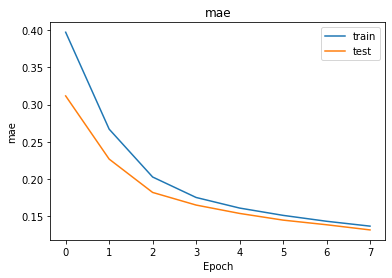

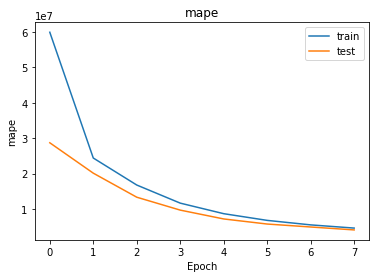

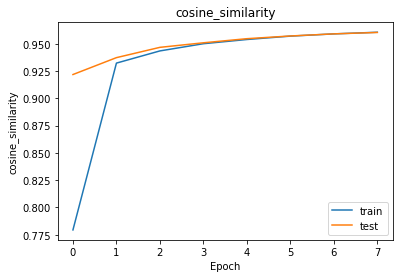

In [125]:
# print(res.history.keys())
plot(res.history)

In [126]:
evaluate_model(model, x_test[:1])

1/1 [==============================] - 0s 129ms/step - loss: 0.0490 - mse: 0.2321 - msle: 0.0490 - mae: 0.1675 - mape: 7346221.0000 - cosine_similarity: 0.9909
Test Loss: [0.0490424782037735, 0.2321479618549347, 0.0490424782037735, 0.1675022691488266, 7346221.0, 0.9908630847930908]


In [127]:
pred = model.predict(x_test)
print(x_test[0])
print(pred[0])

[ 0.  1.  0. 33.  2.  0.  2.  2.  2.  1.  0.  0.  2.  0.  0.  2.  1.  2.
  3.  2.  0.  2.  0.  1.  1.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.]
[0.0000000e+00 4.4298184e-01 0.0000000e+00 3.4190762e+01 1.6639818e+00
 0.0000000e+00 2.9782205e+00 1.7725296e+00 3.3997698e+00 1.4840750e+00
 5.7340902e-01 0.0000000e+00 2.0270801e+00 0.0000000e+00 0.0000000e+00
 8.4481514e-01 0.0000000e+00 1.2671697e+00 0.0000000e+00 1.9212605e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8389971e+00 6.2775981e-01
 0.0000000e+00 2.3636601e+00 1.0345112e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.00

In [129]:
# model.save(f"{DATA_PATH}/1h-13n-8e-notnorm-model.h5")